# Using TensorFlow for Classification (CNN)

Created by John Tan Chong Min (2022). Kindly acknowledge if using this notebook.

Let us use TensorFlow and implement a CNN to classify 10 object classes from Fashion MNIST.

## Start Coding

This is what we had from the MLP notebook.

In [1]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Input(shape = (28,28)),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

2.8.0
Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5027 - accuracy: 0.8249
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3779 - accuracy: 0.8646
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3411 - accuracy: 0.8759
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3162 - accuracy: 0.8842
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.3405 - accuracy: 0.8780


[0.3405190408229828, 0.878000020980835]

As you can see, the accuracy is not that great. It is around 0.87 for me.
Now, let us change the model to that of a Convolutional Neural Network and see how it performs.

In [17]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape = (28,28,1)),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), strides=(1,1), padding='same', activation = tf.nn.relu),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation= tf.nn.relu),
    tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])

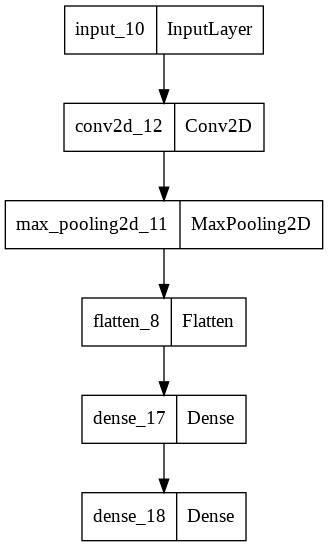

In [18]:
tf.keras.utils.plot_model(model)

In [19]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 14, 14, 16)       0         
 g2D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 3136)              0         
                                                                 
 dense_17 (Dense)            (None, 128)               401536    
                                                                 
 dense_18 (Dense)            (None, 10)                1290      
                                                                 
Total params: 402,986
Trainable params: 402,986
Non-trainable params: 0
________________________________________________

In [20]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# reshape the input to add a channel dimension at the end for CNN processing
model.fit(training_images.reshape((-1,28,28,1)), training_labels, epochs=5)

model.evaluate(test_images.reshape(-1,28,28,1), test_labels)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4080 - accuracy: 0.8553
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2734 - accuracy: 0.9009
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2303 - accuracy: 0.9155
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2001 - accuracy: 0.9259
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.2540 - accuracy: 0.9109


[0.2539825141429901, 0.9108999967575073]

Not too bad. I got around 91.1% accuracy on the test set, which is significantly better than the MLP model, although at x4 the number of model parameters (MLP has 101,770 parameters).

# Optional: Functional API
We can also define the model in a functional form, for greater flexibility.
This is exactly the same as the earlier model. Uncomment the cell to run it.

In [6]:
# inputs = tf.keras.layers.Input(shape = (28,28,1))
# x = tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), strides=(1,1), padding='same', activation = tf.nn.relu)(inputs)
# x = tf.keras.layers.MaxPooling2D(pool_size = (2,2))(x)
# x = tf.keras.layers.Flatten()(x)
# x = tf.keras.layers.Dense(128, activation = tf.nn.relu)(x)
# outputs = tf.keras.layers.Dense(10, activation = tf.nn.softmax)(x)
 
# model = tf.keras.Model(inputs = inputs, outputs = outputs)

# Visualize predictions

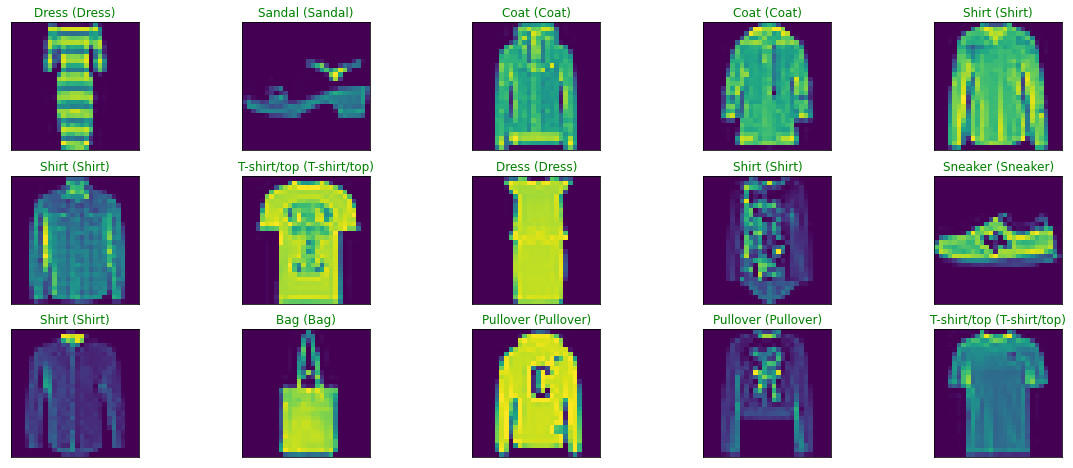

In [7]:
import matplotlib.pyplot as plt
import numpy as np

labels = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
y_hat = model.predict(test_images.reshape(-1,28,28,1))

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(test_images.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(test_images[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = test_labels[index]
    # Set the title for each image
    ax.set_title("{} ({})".format(labels[predict_index], 
                                  labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))
    
plt.show()

# Visualize Filters

In [8]:
import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt

def visualize_filters(model, max_filters_to_display = 32):
    '''Displays the filter weights (only for the first channel for the first 32 filters)
    Inputs: 
    model: the Tensorflow model
    max_filters_to_display: upper limit of the number of filters to show
    '''
    for layer in model.layers:
        # only do for conv layers
        if 'conv' not in layer.name: continue
        # retrieve weights from the layer
        filters, biases = layer.get_weights()
        filternum = min(max_filters_to_display, filters.shape[-1])

        figure = plt.figure(figsize=(20, filternum//8*2))
        print(f'Filter weights in {layer.name} layer')
        for i in range(filternum):
            # get the filter
            f = filters[:, :, :, i]

            # specify subplot and turn of axis
            ax = figure.add_subplot(filternum//8, 8, i + 1, xticks=[], yticks=[])
            ax.set_xticks([])
            ax.set_yticks([])
            # plot filter channel in grayscale (only for first filter level)
            c = ax.imshow(f[:, :, 0], cmap='binary')
            plt.colorbar(c, orientation = 'vertical')
        # show the figure
        plt.show()

Filter weights in conv2d layer


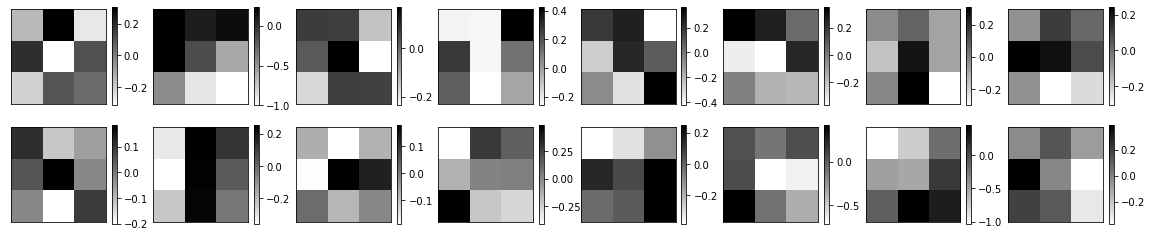

In [9]:
visualize_filters(model)

# Exploration Exercises

Now that we got the basics up, let us change parts of the model and see what happens.

# Exercise 1: Double Conv2D
Let us try adding another Conv2D layer.

In [10]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape = (28,28,1)),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), strides=(1,1), padding='same', activation = tf.nn.relu),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same', activation = tf.nn.relu),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation= tf.nn.relu),
    tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

model.fit(training_images.reshape(-1,28,28,1), training_labels, epochs=5)

model.evaluate(test_images.reshape(-1,28,28,1), test_labels)

2.8.0
Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4266 - accuracy: 0.8465
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2858 - accuracy: 0.8971
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2395 - accuracy: 0.9139
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2095 - accuracy: 0.9230
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.2861 - accuracy: 0.8975


[0.2861064672470093, 0.8974999785423279]

I got around 90% accuracy, which is slightly lower than the base model. Perhaps we may need to tune the learning rate if we add more layers.

# Exercise 2: More filters
How about just increasing the number of filters?

In [11]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape = (28,28,1)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same', activation = tf.nn.relu),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation= tf.nn.relu),
    tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

model.fit(training_images.reshape(-1,28,28,1), training_labels, epochs=5)

model.evaluate(test_images.reshape(-1,28,28,1), test_labels)

2.8.0
Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.3859 - accuracy: 0.8623
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2616 - accuracy: 0.9039
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2161 - accuracy: 0.9199
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1810 - accuracy: 0.9325
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.2431 - accuracy: 0.9171


[0.24313952028751373, 0.9171000123023987]

I got around 91.7% accuracy, which is better than the basic model.

# Exercise 3: Double Conv2D + More Filters
Let us try increasing the filters for two Conv2D layers

In [12]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape = (28,28,1)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same', activation = tf.nn.relu),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same', activation = tf.nn.relu),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation= tf.nn.relu),
    tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

model.fit(training_images.reshape(-1,28,28,1), training_labels, epochs=5)

print(model.evaluate(test_images.reshape(-1,28,28,1), test_labels))

2.8.0
Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3970 - accuracy: 0.8563
Epoch 2/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2590 - accuracy: 0.9060
Epoch 3/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2142 - accuracy: 0.9216
Epoch 4/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1822 - accuracy: 0.9316
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.2498 - accuracy: 0.9167
[0.24981781840324402, 0.916700005531311]


I got around 91.7% accuracy, which is better than the base model.

# Exercise 4: Dropout
Let us add in dropout for the final layer for regularization purposes.

In [34]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape = (28,28,1)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same', activation = tf.nn.relu),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same', activation = tf.nn.relu),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation= tf.nn.relu),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

model.fit(training_images.reshape(-1,28,28,1), training_labels, epochs=5)

print(model.evaluate(test_images.reshape(-1,28,28,1), test_labels))

2.8.0
Epoch 1/5
1875/1875 [==============================] - 35s 6ms/step - loss: 0.5003 - accuracy: 0.8196
Epoch 2/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3380 - accuracy: 0.8783
Epoch 3/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2898 - accuracy: 0.8967
Epoch 4/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.2576 - accuracy: 0.9058
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.2421 - accuracy: 0.9141
[0.2420986294746399, 0.9140999913215637]


I got around 91.4% accuracy, which is about the same as the base model.

# Exercise 5: Filter size 5x5
What if we use a larger filter size?

2.8.0
Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.4090 - accuracy: 0.8547
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2786 - accuracy: 0.8991
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2357 - accuracy: 0.9136
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2014 - accuracy: 0.9257
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.2602 - accuracy: 0.9117
[0.26022160053253174, 0.9117000102996826]
Filter weights in conv2d_13 layer


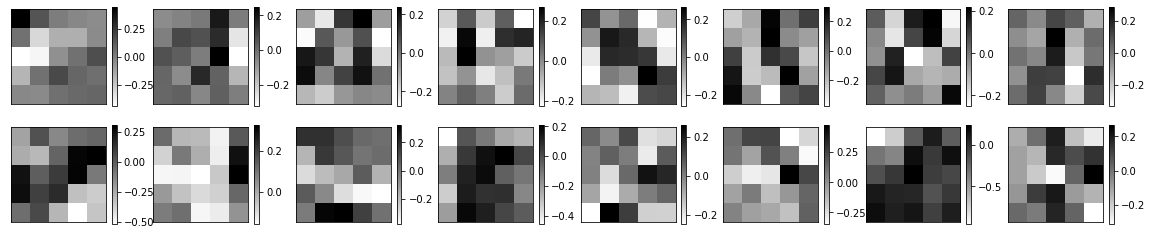

In [23]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape = (28,28,1)),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(5,5), strides=(1,1), padding='same', activation = tf.nn.relu),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation= tf.nn.relu),
    tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

model.fit(training_images.reshape(-1,28,28,1), training_labels, epochs=5)

print(model.evaluate(test_images.reshape(-1,28,28,1), test_labels))

visualize_filters(model)

I got around 91.2% accuracy, which is about the same as the base model. The filter weights show more well defined shapes, which can be useful if there is only one Conv2D layer like this model, but also can be less general when used for subsequent layers which require combining features from the earlier layers.

# Exercise 6: Stride size 2
What if we use a larger stride size?

In [24]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape = (28,28,1)),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), strides=(2,2), padding='same', activation = tf.nn.relu),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation= tf.nn.relu),
    tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

model.fit(training_images.reshape(-1,28,28,1), training_labels, epochs=5)

model.evaluate(test_images.reshape(-1,28,28,1), test_labels)

2.8.0
Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5016 - accuracy: 0.8222
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3449 - accuracy: 0.8768
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2988 - accuracy: 0.8919
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2702 - accuracy: 0.9015
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.2822 - accuracy: 0.8998


[0.28221291303634644, 0.8998000025749207]

I got around 90% accuracy, which is lower than the base model. Having stride > 1 decreases the amount of information that passes through to the next model. Hence, while it decreases the layer size in the next layer, it comes at a cost.

# Exercise 7: Global Average Pooling
What if we just use global average pooling instead of fully connected layers at the end?

In [39]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape = (28,28,1)),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), strides=(1,1), padding='same', activation = tf.nn.relu),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same', activation = tf.nn.relu),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
    tf.keras.layers.Conv2D(filters=10, kernel_size=(1,1), strides=(1,1), padding='same', activation = tf.nn.relu),   
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

model.fit(training_images.reshape(-1,28,28,1), training_labels, epochs=5)

model.evaluate(test_images.reshape(-1,28,28,1), test_labels)

2.8.0
Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 1.2688 - accuracy: 0.5357
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.8336 - accuracy: 0.7014
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.7404 - accuracy: 0.7320
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6922 - accuracy: 0.7476
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.6771 - accuracy: 0.7488


[0.6770840883255005, 0.7487999796867371]

I got around 74.9% accuracy, which is lower than the base model. Hence, GlobalAveragePooling in this case may not work out that well if we prematurely compress the information into just 10 filters.

The typical CNN structure has more filters as we progress down the layers, in order to contain the information from the earlier layers into more buckets, as we reduce the size of each bucket (via MaxPooling etc.)

# Exercise 8: Try to get > 92% test accuracy

Using some or all of the tricks above, try to get > 92% accuracy.

In [33]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape = (28,28,1)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same', activation = tf.nn.relu),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same', activation = tf.nn.relu),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='same', activation = tf.nn.relu),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='same', activation = tf.nn.relu),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation= tf.nn.relu),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

model.fit(training_images.reshape(-1,28,28,1), training_labels, epochs=5)

model.evaluate(test_images, test_labels)

2.8.0
Epoch 1/5
1875/1875 [==============================] - 36s 19ms/step - loss: 0.4560 - accuracy: 0.8363
Epoch 2/5
1875/1875 [==============================] - 36s 19ms/step - loss: 0.2860 - accuracy: 0.8982
Epoch 3/5
1875/1875 [==============================] - 36s 19ms/step - loss: 0.2387 - accuracy: 0.9148
Epoch 4/5
1875/1875 [==============================] - 36s 19ms/step - loss: 0.2081 - accuracy: 0.9249
Epoch 5/5
313/313 [==============================] - 3s 8ms/step - loss: 0.2082 - accuracy: 0.9262


[0.2082330584526062, 0.9261999726295471]

By having Conv2D layers of 64 filters x2 and 128 filters x2, with a Dropout of 0.5, I was able to achieve test accuracy of 92.6%.

Of course, we can further improve the test accuracy via data augmentation, adding "normalization" layers such as BatchNormalization, skip connections (e.g. ResNet), transfer learning from a larger dataset, which are beyond the scope of this notebook.